In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [22]:
df = pd.read_csv("dmt-2024-2nd-assignment/training_set_VU_DM.csv")
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [3]:
df.shape

(4958347, 54)

In [4]:
df_test = pd.read_csv("dmt-2024-2nd-assignment/test_set_VU_DM.csv")
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_test.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_test.shape

(4959183, 50)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   srch_id                      int64         
 1   date_time                    datetime64[ns]
 2   site_id                      int64         
 3   visitor_location_country_id  int64         
 4   visitor_hist_starrating      float64       
 5   visitor_hist_adr_usd         float64       
 6   prop_country_id              int64         
 7   prop_id                      int64         
 8   prop_starrating              int64         
 9   prop_review_score            float64       
 10  prop_brand_bool              int64         
 11  prop_location_score1         float64       
 12  prop_location_score2         float64       
 13  prop_log_historical_price    float64       
 14  position                     int64         
 15  price_usd                    float64       
 16  

In [3]:
for col in df.columns:
    if df[col].dtype != np.float_:
        print('Unique values for {}: {}'.format(col, len(np.unique(df[col]))))

Unique values for srch_id: 199795
Unique values for date_time: 198615
Unique values for site_id: 34
Unique values for visitor_location_country_id: 210
Unique values for prop_country_id: 172
Unique values for prop_id: 129113
Unique values for prop_starrating: 6
Unique values for prop_brand_bool: 2
Unique values for position: 40
Unique values for promotion_flag: 2
Unique values for srch_destination_id: 18127
Unique values for srch_length_of_stay: 36
Unique values for srch_booking_window: 429
Unique values for srch_adults_count: 9
Unique values for srch_children_count: 10
Unique values for srch_room_count: 8
Unique values for srch_saturday_night_bool: 2
Unique values for random_bool: 2
Unique values for click_bool: 2
Unique values for booking_bool: 2


In [4]:
# Calculate the total number of clicks
total_clicks = df['click_bool'].sum()

# Calculate the total number of bookings
total_bookings = df['booking_bool'].sum()

# Print the results
print(f"Total number of clicks: {total_clicks}")
print(f"Total number of bookings: {total_bookings}")

# Total rows in the DataFrame
total_actions = len(df)

# Calculate the total number of clicks
total_clicks = df['click_bool'].sum()

# Calculate the total number of bookings
total_bookings = df['booking_bool'].sum()

# Calculate percentages
percentage_total_clicks = (total_clicks / total_actions) * 100
percentage_total_bookings = (total_bookings / total_actions) * 100

# Print the results
print(f"Percentage of total actions that resulted in clicks: {percentage_total_clicks:.2f}%")
print(f"Percentage of total actions that resulted in bookings: {percentage_total_bookings:.2f}%")

Total number of clicks: 221879
Total number of bookings: 138390
Percentage of total actions that resulted in clicks: 4.47%
Percentage of total actions that resulted in bookings: 2.79%


In [5]:
# Calculate the number of unique searches that resulted in at least one click
searches_with_clicks = df.groupby('srch_id')['click_bool'].max().sum()

# Calculate the number of unique searches that resulted in at least one booking
searches_with_bookings = df.groupby('srch_id')['booking_bool'].max().sum()

# Print the results
print(f"Total searches that resulted in at least one click: {searches_with_clicks}")
print(f"Total searches that resulted in at least one booking: {searches_with_bookings}")

# Calculate total number of unique searches
total_searches = df['srch_id'].nunique()

# Calculate the number of unique searches that resulted in at least one click
searches_with_clicks = df.groupby('srch_id')['click_bool'].max().sum()

# Calculate the number of unique searches that resulted in at least one booking
searches_with_bookings = df.groupby('srch_id')['booking_bool'].max().sum()

# Calculate percentages
percentage_clicks = (searches_with_clicks / total_searches) * 100
percentage_bookings = (searches_with_bookings / total_searches) * 100

# Print the results
print(f"Percentage of searches that resulted in at least one click: {percentage_clicks:.2f}%")
print(f"Percentage of searches that resulted in at least one booking: {percentage_bookings:.2f}%")


Total searches that resulted in at least one click: 199795
Total searches that resulted in at least one booking: 138390
Percentage of searches that resulted in at least one click: 100.00%
Percentage of searches that resulted in at least one booking: 69.27%


In [ ]:
# import matplotlib.dates as mdates

# # Ensure the 'date_time' column is in datetime format
# df['date_time'] = pd.to_datetime(df['date_time'])

# # Create a new column that captures just the date part of 'date_time'
# df['date'] = df['date_time'].dt.date

# # Group by the date and sum the 'booking_bool' column
# bookings_per_day = df.groupby('date')['booking_bool'].sum().reset_index()

# # Now we'll create a column for the month, which we'll use for color coding
# bookings_per_day['month'] = pd.DatetimeIndex(bookings_per_day['date']).month

# # Sort the data by date so that it plots correctly
# bookings_per_day.sort_values('date', inplace=True)

# # Create the plot
# plt.figure(figsize=(20, 8))
# palette = sns.color_palette("hsv", 12)  # Use a perceptually uniform color map
# sns.barplot(x='date', y='booking_bool', hue='month', palette=palette, data=bookings_per_day, dodge=False)

# # Improve the x-axis labels
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# plt.title('Number of Bookings Per Day')
# plt.xlabel('Days of the year')
# plt.ylabel('Amount booked')
# plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot

# # Rotating the x-axis labels for better readability
# plt.xticks(rotation=90)

# plt.tight_layout() 
# plt.show()

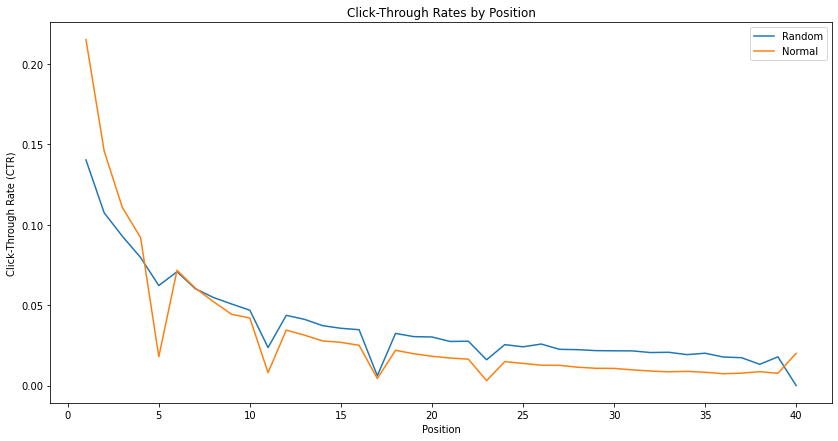

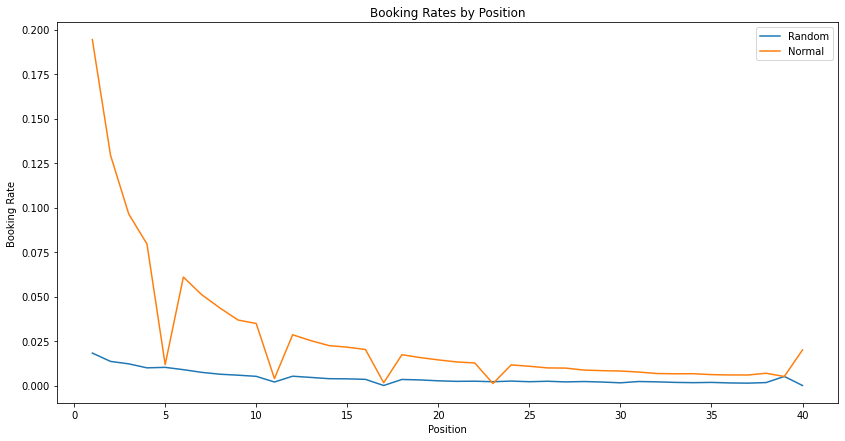

In [10]:
# Calculate the CTR and booking rate by position and random_bool
ctr_by_position_random = df[df['random_bool'] == 1].groupby('position')['click_bool'].mean()
ctr_by_position_normal = df[df['random_bool'] == 0].groupby('position')['click_bool'].mean()
booking_by_position_random = df[df['random_bool'] == 1].groupby('position')['booking_bool'].mean()
booking_by_position_normal = df[df['random_bool'] == 0].groupby('position')['booking_bool'].mean()

# Convert series to DataFrames for plotting
ctr_by_position_random = ctr_by_position_random.reset_index()
ctr_by_position_normal = ctr_by_position_normal.reset_index()
booking_by_position_random = booking_by_position_random.reset_index()
booking_by_position_normal = booking_by_position_normal.reset_index()

# Plotting Click-Through Rates by Position
plt.figure(figsize=(14, 7))
sns.lineplot(x='position', y='click_bool', data=ctr_by_position_random, label='Random')
sns.lineplot(x='position', y='click_bool', data=ctr_by_position_normal, label='Normal')
plt.title('Click-Through Rates by Position')
plt.xlabel('Position')
plt.ylabel('Click-Through Rate (CTR)')
plt.legend()
plt.show()

# Plotting Booking Rates by Position
plt.figure(figsize=(14, 7))
sns.lineplot(x='position', y='booking_bool', data=booking_by_position_random, label='Random')
sns.lineplot(x='position', y='booking_bool', data=booking_by_position_normal, label='Normal')
plt.title('Booking Rates by Position')
plt.xlabel('Position')
plt.ylabel('Booking Rate')
plt.legend()
plt.show()


In [11]:
# df['date_time'] = pd.to_datetime(df['date_time'])
# df.set_index('date_time', inplace=True)

df.resample('W')['click_bool', 'booking_bool'].sum().plot(figsize=(12, 6))
plt.title('Weekly Sum of Clicks and Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Sum of Clicks/Bookings')
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

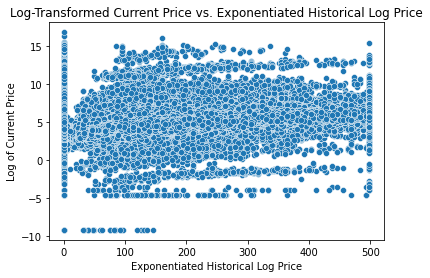

In [12]:
df['log_price_usd'] = np.log(df['price_usd'] + 0.0001)

# Now plot the exponentiated 'prop_log_historical_price' against the log-transformed 'price_usd'
sns.scatterplot(x=np.exp(df['prop_log_historical_price']), y='log_price_usd', data=df)
plt.xlabel('Exponentiated Historical Log Price')
plt.ylabel('Log of Current Price')
plt.title('Log-Transformed Current Price vs. Exponentiated Historical Log Price')
plt.show()

In [13]:
# Check for complete duplicates
duplicate_rows = df[df.duplicated()]

# Check for negative values in columns that should only have positives
negative_values_check = df[(df['price_usd'] < 0) | 
                           (df['prop_starrating'] < 0) |
                           (df['prop_review_score'] < 0) |
                           (df['prop_location_score1'] < 0) |
                           (df['prop_location_score2'] < 0) |
                           (df['orig_destination_distance'] < 0)]

# Check for valid boolean fields
invalid_bools = df[(df['random_bool'] != 0) & (df['random_bool'] != 1) |
                   (df['srch_saturday_night_bool'] != 0) & (df['srch_saturday_night_bool'] != 1)]

# Output the results
print(f"Duplicate Rows: {duplicate_rows.shape[0]}")
print(f"Negative Values Issues: {negative_values_check.shape[0]}")
print(f"Invalid Booleans: {invalid_bools.shape[0]}")

Duplicate Rows: 0
Negative Values Issues: 0
Invalid Booleans: 0


In [14]:
# Extend checks to other numerical features
additional_negatives_check = df[(df['srch_adults_count'] < 0) | 
                                (df['srch_children_count'] < 0) | 
                                (df['srch_room_count'] < 0) | 
                                (df['srch_booking_window'] < 0) | 
                                (df['srch_length_of_stay'] < 0) | 
                                (df['prop_location_score1'] < 0) | 
                                (df['prop_location_score2'] < 0) |
                                (df['promotion_flag'] < 0) | 
                                (df['promotion_flag'] > 1)]

# Print the results for the additional checks
print(f"Additional Negative Values Issues: {additional_negatives_check.shape[0]}")


Additional Negative Values Issues: 0


# Check for Nulls

In [7]:
missing_data = df.isna().mean().round(4) * 100
missing_data = pd.DataFrame(missing_data).reset_index()
missing_data.columns = ["column", "missing"]
missing_data.query("missing > 0", inplace=True)

In [8]:
missing_data

,column,missing
4,visitor_hist_starrating,94.92
5,visitor_hist_adr_usd,94.90
9,prop_review_score,0.15
12,prop_location_score2,21.99
24,srch_query_affinity_score,93.60
25,orig_destination_distance,32.43
27,comp1_rate,97.58
28,comp1_inv,97.39
29,comp1_rate_percent_diff,98.10
30,comp2_rate,59.17


In [17]:
len(missing_data)

31

In [18]:

# plt.rcParams["figure.figsize"]=10,5
# plt.rc('xtick', labelsize=25) 
# plt.rc('ytick', labelsize=25) 
# text_size = 25
# line_width = 2.5
# plt.style.use('ggplot')
# sns.set_palette("rocket")

/var/folders/lf/9kmpp6sj6r5336sq3nv74tjw0000gn/T/ipykernel_50619/382146893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data = missing_data,


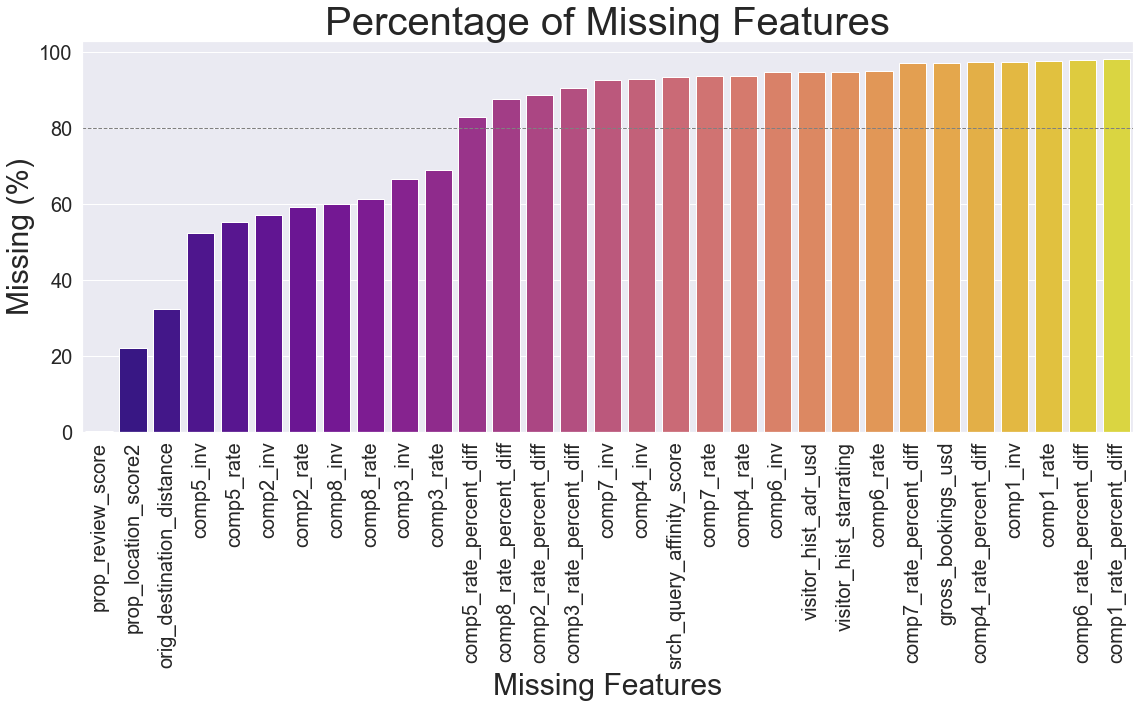

In [11]:
missing_data.sort_values("missing", inplace=True)

sns.set(rc={'figure.figsize':(16, 10)})

plot=sns.barplot(data = missing_data,
            x = "column",
            y = "missing",
            palette="plasma")
plt.xticks(rotation=90, size = 20)
plt.yticks(size = 20)
plt.axhline(y=80, color='grey', linestyle='--', linewidth=1)
plot.set_title('Percentage of Missing Features', size = 40)
plot.set_ylabel('Missing (%)', size = 30)    
plot.set_xlabel('Missing Features', size = 30)
plt.tight_layout()
plt.savefig('missing_features.png')
plt.show() 

In [20]:
missing_data = df.isnull().mean() * 100  # Calculate percentage of missing data per column

total_columns_with_missing_data = missing_data.count()  # Total columns analyzed
columns_missing_more_than_50 = missing_data[missing_data > 50].count()  # Columns with more than 50% missing
columns_missing_more_than_80 = missing_data[missing_data > 80].count()  # Columns with more than 80% missing

print("Total columns with missing data:", total_columns_with_missing_data)
print("Columns missing more than 50%:", columns_missing_more_than_50)
print("Columns missing more than 80%:", columns_missing_more_than_80)

Total columns with missing data: 55
Columns missing more than 50%: 28
Columns missing more than 80%: 20


In [21]:
# df['date_time'] = pd.to_datetime(df['date_time'])

summary_stats = {
    'Column': [
        'srch_id', 'prop_id', 'date_time', 'click_bool', 'booking_bool',
        'promotion_flag', 'prop_brand_bool', 'random_bool'
    ],
    'Summary statistics': [
        f"{df['srch_id'].nunique()} unique values. Every srch_id occurs at least {df['srch_id'].value_counts().min()} times and a maximum of {df['srch_id'].value_counts().max()} times.",
        f"{df['prop_id'].nunique()} unique values.",
        f"Data available for the period {df['date_time'].min().strftime('%Y %m %d')} - {df['date_time'].max().strftime('%Y %m %d')}",
        f"{df['click_bool'].mean() * 100:.2f}% of the results were clicked (click rate)",
        f"{df['booking_bool'].mean() * 100:.2f}% of the results were booked (booking rate)",
        f"{df['promotion_flag'].mean() * 100:.2f}% of results had a promotion flag. Booking/click rate with a flag - {df[df['promotion_flag'] == 1]['booking_bool'].mean() * 100:.2f}%/{df[df['promotion_flag'] == 1]['click_bool'].mean() * 100:.2f}%, without a flag - {df[df['promotion_flag'] == 0]['booking_bool'].mean() * 100:.2f}%/{df[df['promotion_flag'] == 0]['click_bool'].mean() * 100:.2f}%",
        f"{df['prop_brand_bool'].mean() * 100:.2f}% of results come from a major hotel chain. Booking/click rate for major brand hotels - {df[df['prop_brand_bool'] == 1]['booking_bool'].mean() * 100:.2f}%/{df[df['prop_brand_bool'] == 1]['click_bool'].mean() * 100:.2f}%, for non-major brand hotels - {df[df['prop_brand_bool'] == 0]['booking_bool'].mean() * 100:.2f}%/{df[df['prop_brand_bool'] == 0]['click_bool'].mean() * 100:.2f}%",
        f"{df['random_bool'].mean() * 100:.2f}% of the results were returned in a random manner. Random sorting booking/click rate - {df[df['random_bool'] == 1]['booking_bool'].mean() * 100:.2f}%/{df[df['random_bool'] == 1]['click_bool'].mean() * 100:.2f}%, algorithmic - {df[df['random_bool'] == 0]['booking_bool'].mean() * 100:.2f}%/{df[df['random_bool'] == 0]['click_bool'].mean() * 100:.2f}%"
    ]
}

# Creating DataFrame
summary_df = pd.DataFrame(summary_stats)

# Using tabulate to display the table in a nice format
from tabulate import tabulate
print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Column          │ Summary statistics                                                                                                                                 │
╞═════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ srch_id         │ 199795 unique values. Every srch_id occurs at least 5 times and a maximum of 38 times.                                                             │
├─────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ prop_id         │ 129113 unique values.                                                                                                                  

# Basic EDA

In [ ]:
# import pandas as pd

# # Load the large CSV file
# file_path = 'dmt-2024-2nd-assignment/training_set_VU_DM.csv'
# data = pd.read_csv(file_path)

# # Define the size of each chunk
# chunk_size = 500000  # This number depends on your needs

# # Split the CSV into chunks
# for i in range(0, len(data), chunk_size):
#     chunk = data.iloc[i:i + chunk_size]
#     chunk.to_csv(f'chunk_{i//chunk_size}.csv', index=False)


In [ ]:
# Correlation heatmap
plt.figure(figsize=(45, 40))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Plots of specific columns

In [12]:
df_click = df[df["click_bool"]==1]
df_book = df[df["booking_bool"]==1]

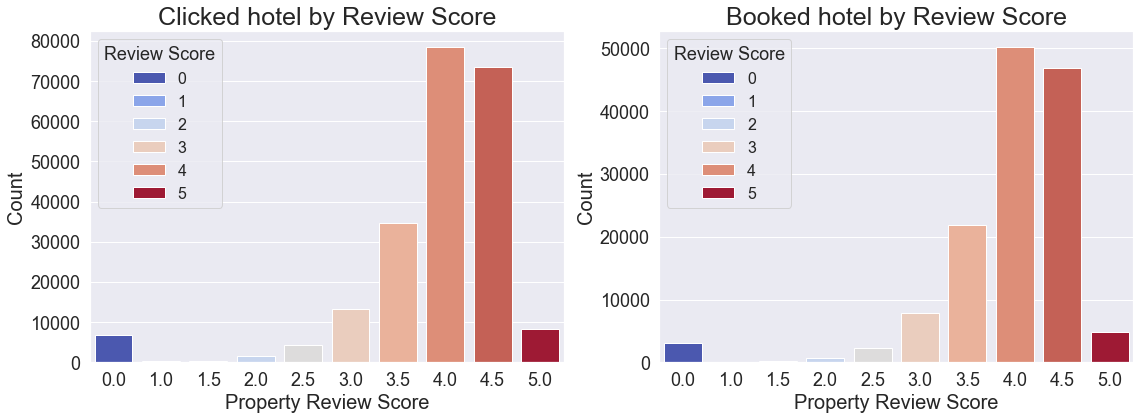

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns of subplots

# Plotting clicked only hotels
sns.countplot(x="prop_review_score", hue="prop_review_score", data=df_click, palette="coolwarm", ax=axes[0])
axes[0].set_title("Clicked hotel by Review Score", fontsize=25)
axes[0].set_xlabel("Property Review Score", fontsize=20)
axes[0].set_ylabel("Count", fontsize=20)
axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)
axes[0].legend(title="Review Score", fontsize=16, title_fontsize=18)

# Plotting booked only hotels
sns.countplot(x="prop_review_score", hue="prop_review_score", data=df_book, palette="coolwarm", ax=axes[1])
axes[1].set_title("Booked hotel by Review Score", fontsize=25)
axes[1].set_xlabel("Property Review Score", fontsize=20)
axes[1].set_ylabel("Count", fontsize=20)
axes[1].tick_params(axis='x', labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)
axes[1].legend(title="Review Score", fontsize=16, title_fontsize=18)

# Improve layout and show plot
plt.tight_layout()
plt.savefig('review_scores.png')
plt.show()

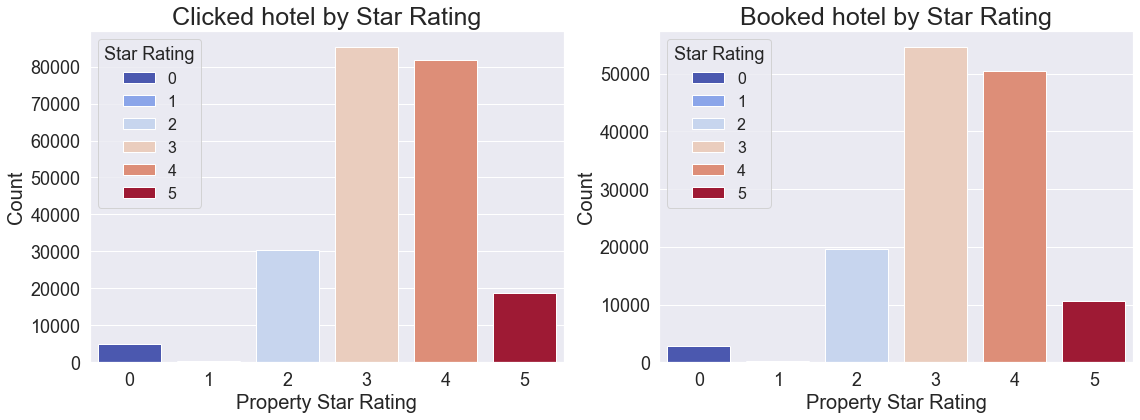

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns of subplots

# Plotting clicked only hotels
sns.countplot(x="prop_starrating", hue="prop_starrating", data=df_click, palette="coolwarm", ax=axes[0])
axes[0].set_title("Clicked hotel by Star Rating", fontsize=25)
axes[0].set_xlabel("Property Star Rating", fontsize=20)
axes[0].set_ylabel("Count", fontsize=20)
axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)
axes[0].legend(title="Star Rating", fontsize=16, title_fontsize=18)

# Plotting booked only hotels
sns.countplot(x="prop_starrating", hue="prop_starrating", data=df_book, palette="coolwarm", ax=axes[1])
axes[1].set_title("Booked hotel by Star Rating", fontsize=25)
axes[1].set_xlabel("Property Star Rating", fontsize=20)
axes[1].set_ylabel("Count", fontsize=20)
axes[1].tick_params(axis='x', labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)
axes[1].legend(title="Star Rating", fontsize=16, title_fontsize=18)

# Improve layout and show plot
plt.tight_layout()
plt.savefig('star_rating.png')

plt.show()

In [24]:
# Calculate the click-through rate (CTR) by position
click_rate_by_position = df.groupby('position')['click_bool'].mean()

# Calculate the booking rate by position
booking_rate_by_position = df.groupby('position')['booking_bool'].mean()

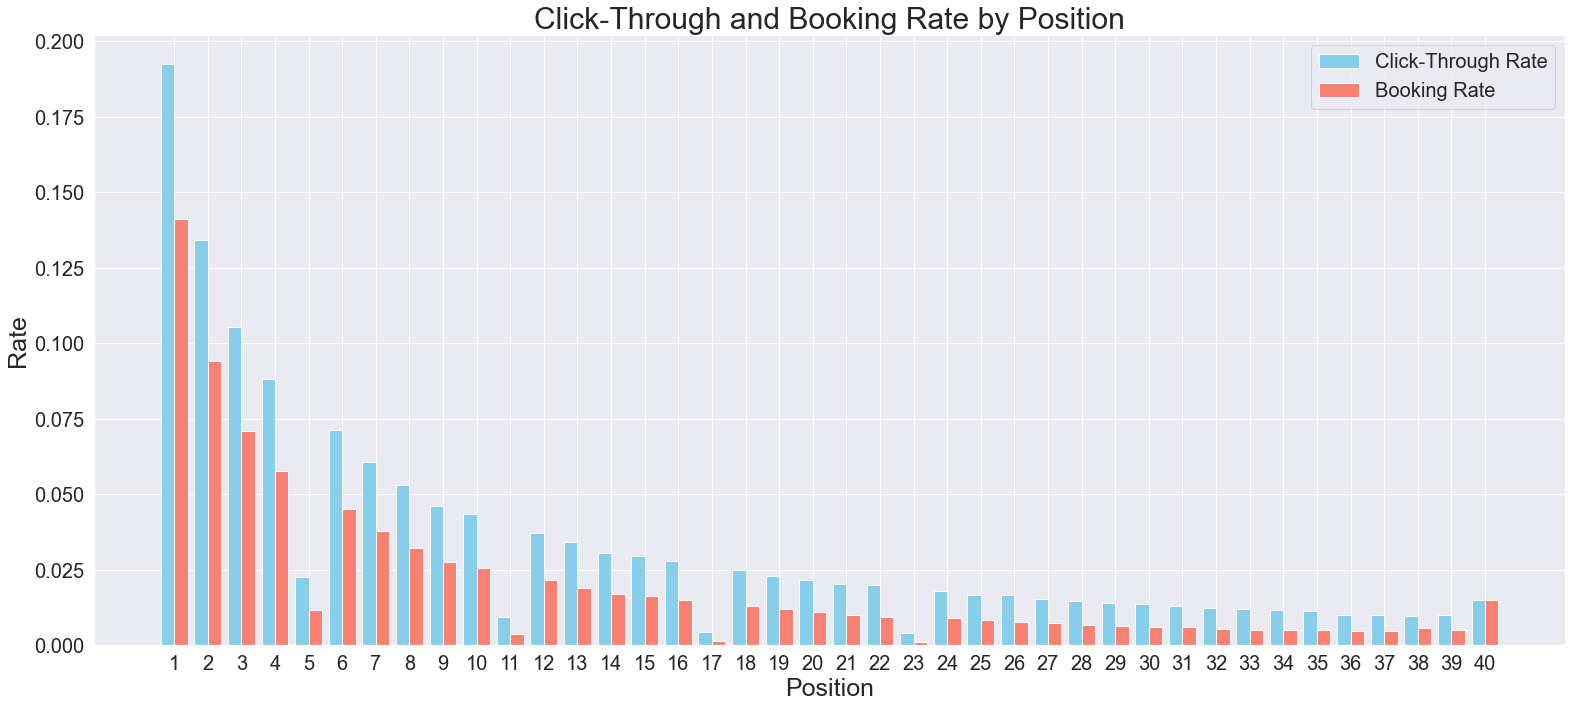

In [39]:

fig, ax = plt.subplots(figsize=(22, 10))

# Adjusting the positions slightly to avoid overlapping bars
positions = np.arange(len(click_rate_by_position))
width = 0.4  # the width of the bars

ax.bar(positions - width/2, click_rate_by_position, width, label='Click-Through Rate', color='skyblue')
ax.bar(positions + width/2, booking_rate_by_position, width, label='Booking Rate', color='salmon')

ax.set_title('Click-Through and Booking Rate by Position', fontsize=30)
ax.set_xlabel('Position', fontsize=25)
ax.set_ylabel('Rate', fontsize=25)
ax.set_xticks(positions)
ax.set_xticklabels(click_rate_by_position.index, fontsize = 20)
ax.tick_params(axis='y', labelsize=20)
ax.legend(fontsize=20)

plt.tight_layout()
plt.savefig('booking_click_by_position.png')

plt.show()

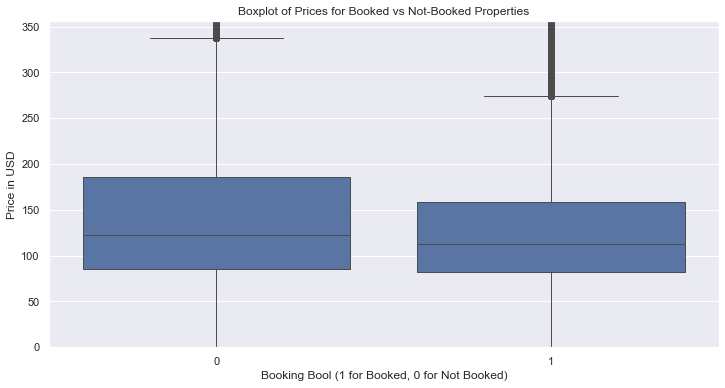

In [26]:
# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='booking_bool', y='price_usd', data=df)
plt.title('Boxplot of Prices for Booked vs Not-Booked Properties')
plt.xlabel('Booking Bool (1 for Booked, 0 for Not Booked)')
plt.ylabel('Price in USD')
plt.ylim(0, df['price_usd'].quantile(0.95))  # Limit y-axis to 95th percentile for better visualization
plt.show()


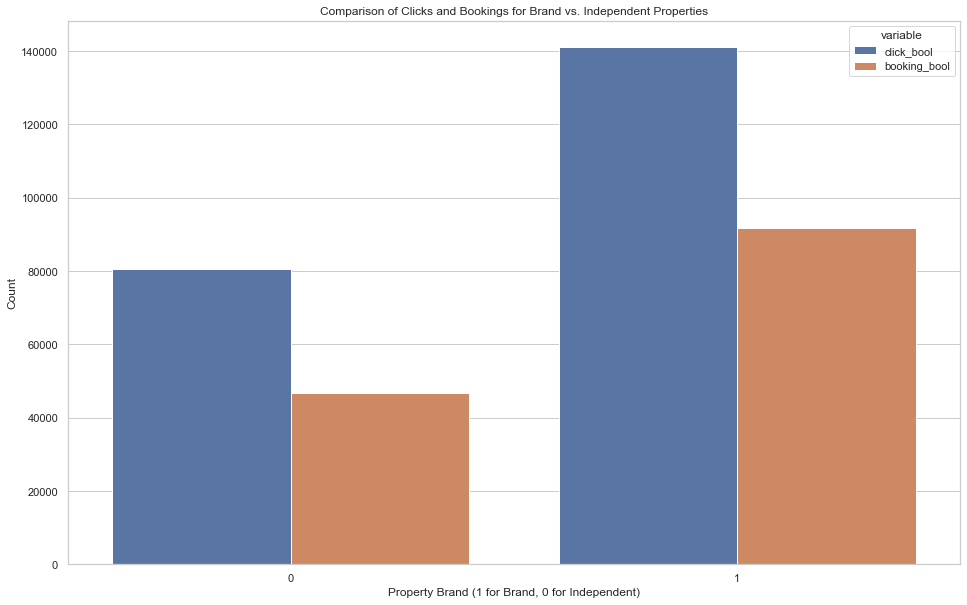

In [27]:
# Aggregate the data for plotting
brand_clicks_bookings = df.groupby('prop_brand_bool')[['click_bool', 'booking_bool']].sum().reset_index()

# Plot
sns.set_style("whitegrid")
brand_clicks_bookings_melted = pd.melt(brand_clicks_bookings, id_vars=['prop_brand_bool'], 
                                       value_vars=['click_bool', 'booking_bool'])

sns.barplot(x='prop_brand_bool', y='value', hue='variable', data=brand_clicks_bookings_melted)
plt.title('Comparison of Clicks and Bookings for Brand vs. Independent Properties')
plt.xlabel('Property Brand (1 for Brand, 0 for Independent)')
plt.ylabel('Count')
plt.show()


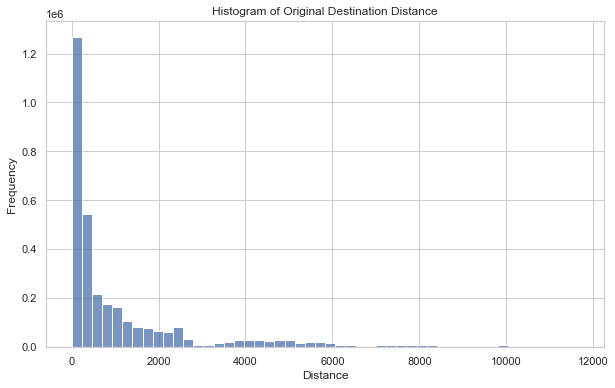

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['orig_destination_distance'].notnull()]['orig_destination_distance'], bins=50)
plt.title('Histogram of Original Destination Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()


# Outlier Check

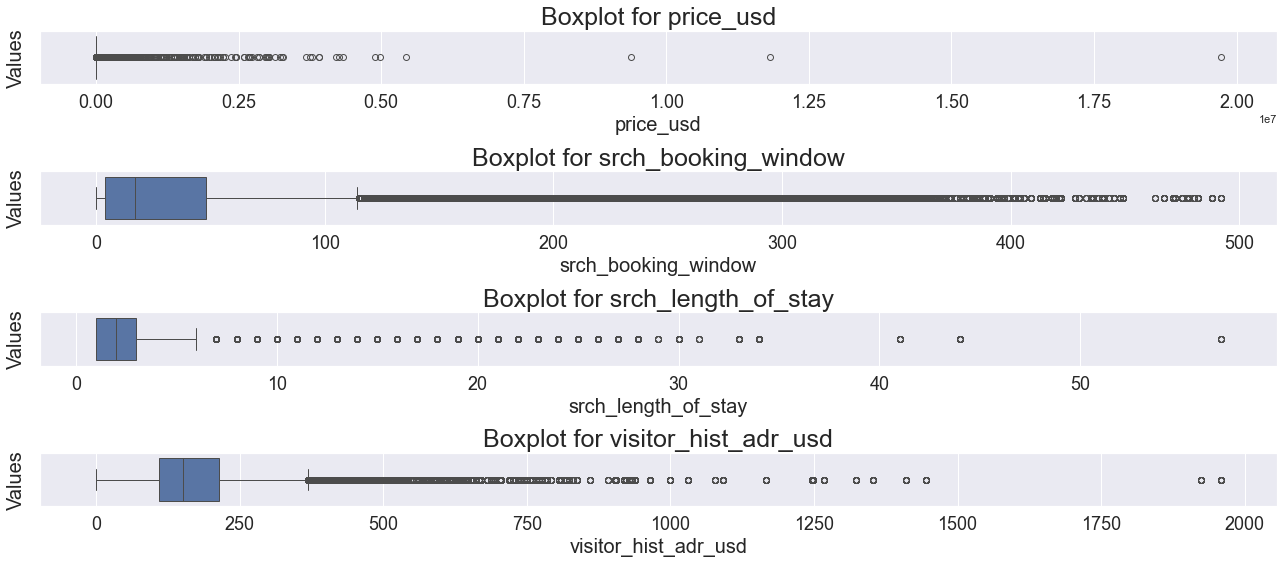

In [41]:
numerical_columns = [
    'price_usd',
    'srch_booking_window',
    'srch_length_of_stay',
    'visitor_hist_adr_usd'
]


# Create a boxplot for each numerical column with increased text sizes
plt.figure(figsize=(18, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}', fontsize=25)  # Increase the title font size
    plt.xlabel(col, fontsize=20)  # Increase the x-axis label font size
    plt.ylabel('Values', fontsize=20)  # Increase the y-axis label font size
    plt.xticks(fontsize=18)  # Increase the x-tick label font size
    plt.yticks(fontsize=18)  # Increase the y-tick label font size

# Ensure the subplots do not overlap and the plot is displayed properly
plt.tight_layout()
plt.savefig('outliers.png')

plt.show()

             click_bool  booking_bool
random_bool                          
0              0.043969      0.037402
1              0.046604      0.005325


/var/folders/lf/9kmpp6sj6r5336sq3nv74tjw0000gn/T/ipykernel_27327/3637459137.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_stats.index, y=grouped_stats['click_bool'], palette='coolwarm')
/var/folders/lf/9kmpp6sj6r5336sq3nv74tjw0000gn/T/ipykernel_27327/3637459137.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_stats.index, y=grouped_stats['booking_bool'], palette='coolwarm')


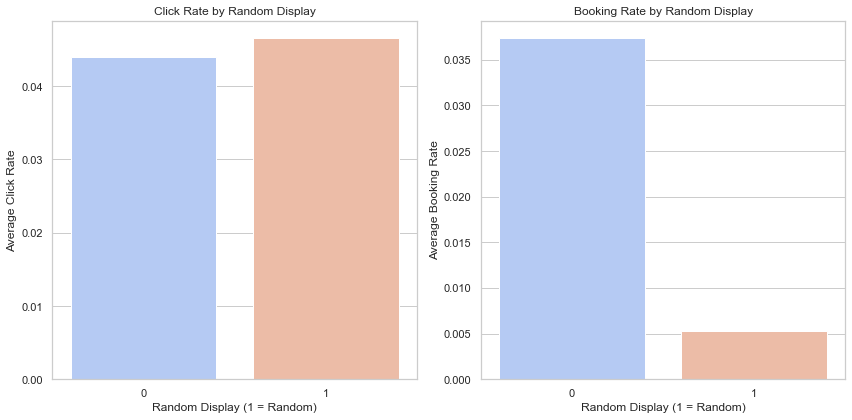

In [30]:
# Group by 'random_bool' and calculate the mean for 'click_bool' and 'booking_bool'
grouped_stats = df.groupby('random_bool')[['click_bool', 'booking_bool']].mean()
print(grouped_stats)

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a bar plot for click rates
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=grouped_stats.index, y=grouped_stats['click_bool'], palette='coolwarm')
plt.title('Click Rate by Random Display')
plt.xlabel('Random Display (1 = Random)')
plt.ylabel('Average Click Rate')

# Creating a bar plot for booking rates
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x=grouped_stats.index, y=grouped_stats['booking_bool'], palette='coolwarm')
plt.title('Booking Rate by Random Display')
plt.xlabel('Random Display (1 = Random)')
plt.ylabel('Average Booking Rate')

plt.tight_layout()
plt.show()

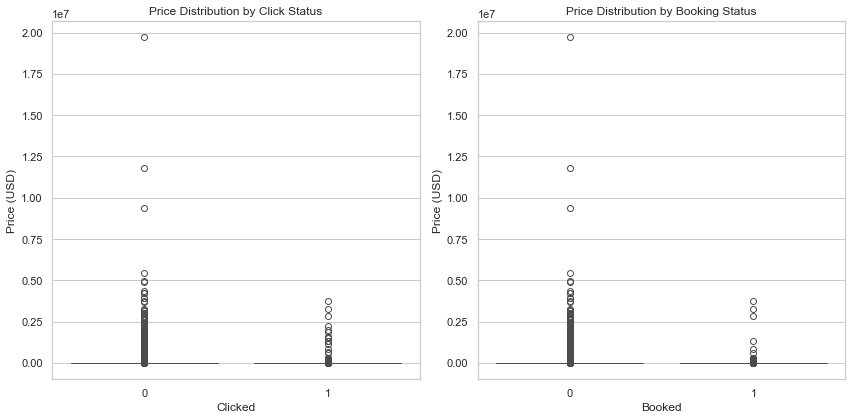

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='click_bool', y='price_usd', data=df)
plt.title('Price Distribution by Click Status')
plt.xlabel('Clicked')
plt.ylabel('Price (USD)')

plt.subplot(1, 2, 2)
sns.boxplot(x='booking_bool', y='price_usd', data=df)
plt.title('Price Distribution by Booking Status')
plt.xlabel('Booked')
plt.ylabel('Price (USD)')

plt.tight_layout()
plt.show()
